In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib.colors import Colormap
import matplotlib.cm as cm

import george
from george.kernels import ExpSquaredKernel, WhiteKernel

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [10]:
file = 'gpdata.csv'

df = pd.read_table(file, header=None, delim_whitespace=True)
# df

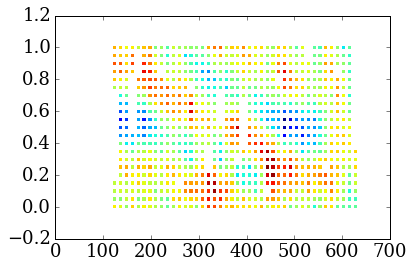

In [28]:
ok = np.where((df[2] > 0))

plt.scatter(df[0].values[ok], df[1].values[ok], c=df[2].values[ok], norm=LogNorm(), 
            lw=0, marker='s',s=10)

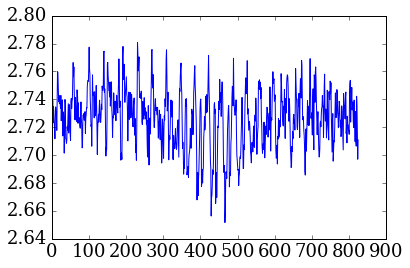

In [32]:
y = df[2].values[ok]
yerr = np.random.random(len(y))*1e-5 + 1e-4
x = np.arange(len(y))

plt.plot(x,y)

In [58]:
# make the kernel
k = ExpSquaredKernel(10, ndim=1) + WhiteKernel(.001, ndim=1)

# make a class instance for the GP
gp = george.GP(k)

In [59]:
#
gp.compute(x, yerr)

In [60]:
xfine = np.arange(len(x)*3.)/3.

mu, cov = gp.predict(y, xfine)

(2.7, 2.8)

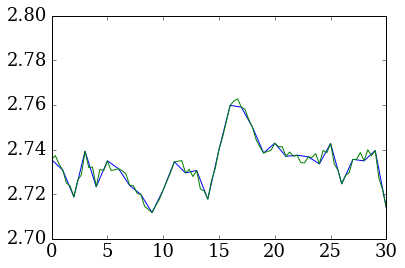

In [61]:
plt.plot(x,y)
plt.plot(xfine,mu)
plt.xlim(0,30)
plt.ylim(2.7,2.8)

In [65]:
# now let's fit the hyperparameters
gp.optimize(x, y, verbose=True, )

Desired error not necessarily achieved due to precision loss.


(array([  1.75553100e+02,   1.36155406e-02]),
    status: 2
  success: False
     njev: 35
     nfev: 45
 hess_inv: array([[  1.00000001e+00,   7.04818820e-06],
       [  7.04818820e-06,   9.54923551e-06]])
      fun: -1901.8793160949324
        x: array([ 5.16794156, -4.29654345])
  message: 'Desired error not necessarily achieved due to precision loss.'
      jac: array([-0.00013331,  0.05065842])
      nit: 1)

In [66]:
mu, cov = gp.predict(y, xfine)

(2.7, 2.8)

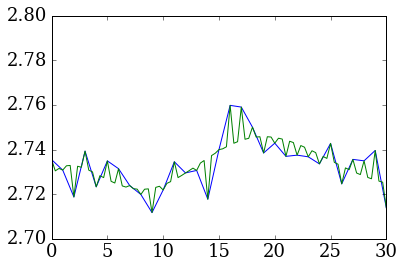

In [67]:
plt.plot(x,y)
plt.plot(xfine,mu)
plt.xlim(0,30)
plt.ylim(2.7,2.8)